# Contour Extraction

**This is where the segmented image such as liver, left and right kidneys ,spleen features are filtered and their shape and positional features are obtained**

In [1]:
import cv2
new = cv2.imread('D:/pgmnew/liver/1.png')

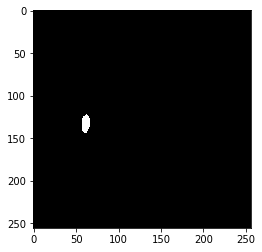

In [2]:
import matplotlib.pyplot as plt
plt.imshow(new)

In [3]:
gray = cv2.cvtColor(new,cv2.COLOR_BGR2GRAY)

In [4]:
import numpy as np
np.max(gray)

255

In [5]:
_,thresh = cv2.threshold(gray,254,255,cv2.THRESH_BINARY)

In [6]:
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [7]:
cnt = contours[0]

In [8]:
area = cv2.contourArea(cnt)

In [9]:
area

139.5

In [10]:
perimeter = cv2.arcLength(cnt,True)

In [11]:
perimeter

51.213202714920044

In [12]:
cv2.drawContours(new,contours,-1,(0,255,1),2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

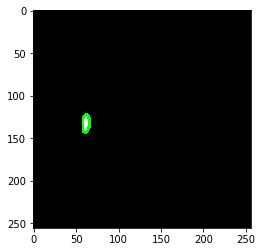

In [13]:
plt.imshow(new)

In [14]:
hull = cv2.convexHull(cnt)

In [15]:
hull

array([[[ 66, 136]],

       [[ 65, 139]],

       [[ 64, 141]],

       [[ 61, 144]],

       [[ 58, 141]],

       [[ 58, 127]],

       [[ 59, 125]],

       [[ 62, 122]],

       [[ 63, 122]],

       [[ 65, 124]],

       [[ 66, 127]]], dtype=int32)

In [16]:
k = cv2.isContourConvex(cnt)

In [17]:
k

False

In [18]:
import math
circularity = (area * 4 * math.pi)/(perimeter ** 2)

In [19]:
circularity

0.6683750035321376

In [21]:
contours

[array([[[ 62, 122]],
 
        [[ 59, 125]],
 
        [[ 59, 126]],
 
        [[ 58, 127]],
 
        [[ 58, 141]],
 
        [[ 61, 144]],
 
        [[ 64, 141]],
 
        [[ 64, 140]],
 
        [[ 65, 139]],
 
        [[ 65, 137]],
 
        [[ 66, 136]],
 
        [[ 66, 127]],
 
        [[ 65, 126]],
 
        [[ 65, 124]],
 
        [[ 63, 122]]], dtype=int32)]

In [22]:
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)

In [57]:
import glob

In [56]:
path = 'D:/pgmnew'
final_label = []
train_images = []
total_images = 0

In [59]:
labels = ['liver','rightkidney','leftkidney','spleen']
index = [0,1,2,3]
for label,i in zip(labels,index):
    for file in glob.glob(path+"/"+label+"/"+"*.png"):
        img = cv2.imread(file)
        total_images+=1
        train_images.append(img)
        final_label.append(i)
print(total_images)

1202


In [67]:
image_features = []
for i in train_images:
    gray = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray,254,255,cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    convexity = cv2.isContourConvex(cnt)
    circularity = (area * 4 * math.pi)/(perimeter ** 2)
    x,y,w,h = cv2.boundingRect(cnt)
    image_features.append([area,perimeter,convexity,circularity,x,y,w,h])
    

    
    

In [75]:
import pandas as pd
medical_df = pd.DataFrame(columns=['Area','Perimeter','Convexity','Circularity','X_start','Y_start','Width','Height'])

C:\Users\NKBC\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [92]:
medical_df = medical_df.append(pd.DataFrame(image_features, columns=medical_df.columns))

In [80]:
df_label = pd.DataFrame(final_label,columns=['Segmented_label'])

In [94]:
result = pd.concat([medical_df, df_label], axis=1)

In [97]:
result.to_csv('CHAOS_FEATURES.csv')